In [10]:
from joblib import load

data = load('../results/baseline.joblib')
baseline_rmse = data['rmse']

data = load('../results/train_test_prep.joblib')
train_prep = data['train_prep']
test_prep = data['test_prep']
y_train = data['y_train']
y_test = data['y_test']
y_test.reset_index(drop=True, inplace=True)

data = load('../results/elasticnet_results.joblib')
elasticnet_model = data['model']
elasticnet_test_scores = data['scores']

data = load('../results/knn_results.joblib')
knn_model = data['model']
knn_test_scores = data['scores']

data = load('../results/randforest_results.joblib')
randforest_model = data['model']
randforest_test_scores = data['scores']

data = load('../results/xgb_results.joblib')
xgb_model = data['model']
xgb_test_scores = data['scores']

In [11]:
baseline_rmse, np.mean(elasticnet_test_scores), np.mean(knn_test_scores), np.mean(randforest_test_scores), np.mean(xgb_test_scores)

(62.477568414794156,
 10.933761090182498,
 16.28251093177203,
 7.472247257501337,
 8.341532594098176)

In [12]:
# Print hyperparameters of the best Elastic Net model
print("Best Elastic Net Model Hyperparameters:")
print(elasticnet_model.get_params())
print("\n")

# Print hyperparameters of the best KNN model
print("Best KNN Model Hyperparameters:")
print(knn_model.get_params())
print("\n")

# Print hyperparameters of the best Random Forest model
print("Best Random Forest Model Hyperparameters:")
print(randforest_model.get_params())
print("\n")

# Print hyperparameters of the best XGBoost model
print("Best XGBoost Model Hyperparameters:")
print(xgb_model.get_params())

Best Elastic Net Model Hyperparameters:
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 1.0, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.5, 'warm_start': False}


Best KNN Model Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}


Best Random Forest Model Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 9, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 168, 'verbose': 0, 'warm_start': False}


Best XGBoost Model Hyperparameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_train_mean = np.mean(y_train)

baseline = np.full(len(test_prep), y_train_mean)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline))

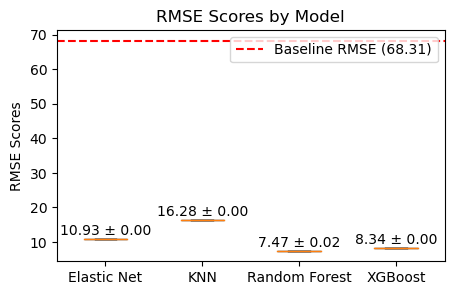

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data = [elasticnet_test_scores, knn_test_scores, randforest_test_scores, xgb_test_scores]
labels = ['Elastic Net', 'KNN', 'Random Forest', 'XGBoost']

plt.figure(figsize=(5, 3))
bplot = plt.boxplot(data, labels=labels, patch_artist=True)

# Highlight baseline RMSE
plt.hlines(baseline_rmse, 0.5, 4.5, colors='red', linestyles='dashed', label='Baseline RMSE (68.31)')

# Adding mean and std deviation above each box plot
for i in range(len(data)):
    mean = np.mean(data[i])
    std = np.std(data[i])
    plt.text(i+1, max(data[i]) + 1.15, f'{mean:.2f} ± {std:.2f}', ha='center')

plt.title('RMSE Scores by Model')
plt.ylabel('RMSE Scores')
plt.legend()

plt.savefig('../figures/rmses_by_model.png', dpi=600)

plt.show()


In [15]:
ftr_names = test_prep.columns

np.random.seed(42)

y_train_mean = np.mean(y_train)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

y_test_pred = randforest_model.predict(test_prep)
test_score = np.sqrt(mean_squared_error(y_test,y_test_pred))

print('test RMSE = ',test_score)
print('test baseline RMSE = ', baseline_rmse)
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = test_prep.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(test_prep[ftr_names[i]].values)
        y_test_shuffled_pred = randforest_model.predict(X_test_shuffled)
        acc_scores.append(np.sqrt(mean_squared_error(y_test,y_test_shuffled_pred)))
    print('   shuffled test RMSE:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test RMSE =  7.456872499697859
test baseline RMSE =  68.30583343255866
shuffling num__Place
   shuffled test RMSE: 7.515 +/- 0.011
shuffling num__Time (sec)
   shuffled test RMSE: 19.983 +/- 0.065
shuffling num__Temperature
   shuffled test RMSE: 7.434 +/- 0.003
shuffling num__Cloud Coverage
   shuffled test RMSE: 7.449 +/- 0.002
shuffling num__Wind Speed
   shuffled test RMSE: 7.462 +/- 0.003
shuffling num__Precipitation
   shuffled test RMSE: 7.455 +/- 0.0
shuffling num__Dew Point
   shuffled test RMSE: 7.432 +/- 0.002
shuffling num__Humidity
   shuffled test RMSE: 7.488 +/- 0.009
shuffling num__Visibility
   shuffled test RMSE: 7.45 +/- 0.001
shuffling num__Time-Place
   shuffled test RMSE: 7.525 +/- 0.011
shuffling num__Speed_Difference_From_Avg
   shuffled test RMSE: 9.674 +/- 0.041
shuffling num__Distance (mi)
   shuffled test RMSE: 7.485 +/- 0.007
shuffling num__Speed (mi/sec)
   shuffled test RMSE: 26.231 +/- 0.084
shuffling num__Average_Time
   shuffled test RMSE: 7.678 +/- 0.

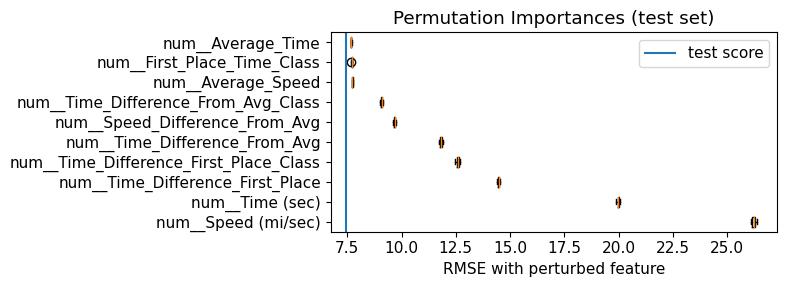

In [17]:
import matplotlib.pylab as plt

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1][:10]
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(8,3))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('RMSE with perturbed feature')
plt.legend()
plt.tight_layout()

plt.savefig('../figures/permutation_importances.png', dpi=600)

plt.show()

In [18]:
print(np.shape(test_prep))

(29247, 56)


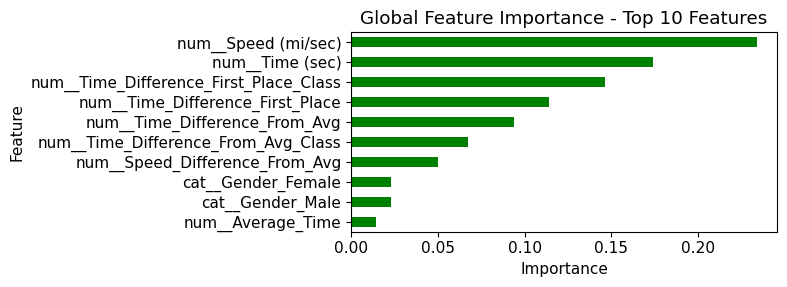

In [19]:
import pandas as pd

# random forest built-in feature importance
global_importances = pd.Series(randforest_model.feature_importances_, index=train_prep.columns)
top_10_importances = global_importances.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8, 3))
top_10_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Top 10 Features")

plt.tight_layout()
plt.savefig('../figures/randforest_feature_importances.png', dpi=600)

plt.show()

In [20]:
import shap

explainer = shap.TreeExplainer(randforest_model, data=train_prep)
shap_values = explainer.shap_values(test_prep[:1000])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
100%|===================| 995/1000 [02:17<00:00]        

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


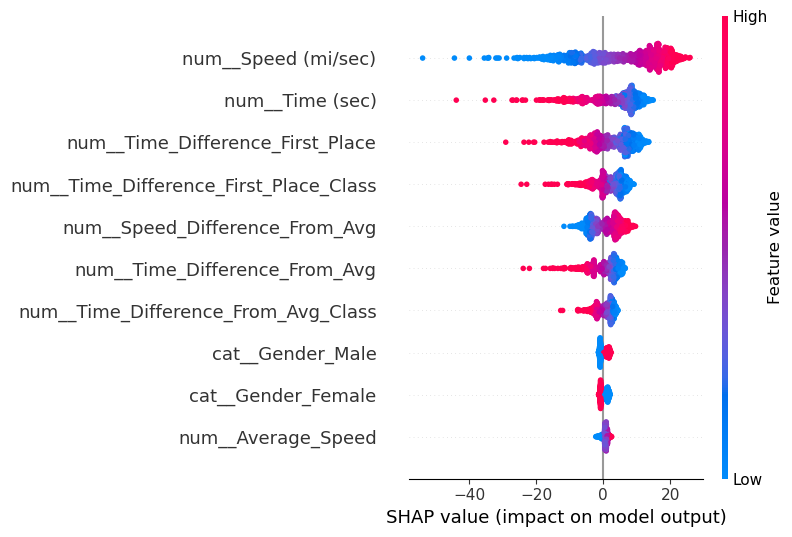

In [21]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, test_prep[:1000], max_display=10, show=False)
pl.savefig('../figures/shap_summary_plot.png', dpi=600)
pl.show()

<Figure size 2000x300 with 0 Axes>

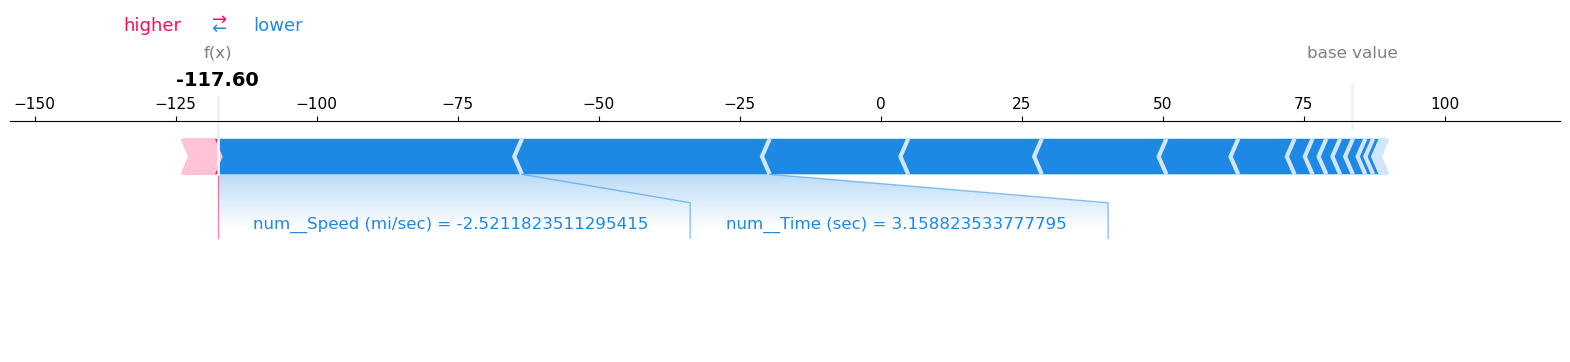

<Figure size 2000x300 with 0 Axes>

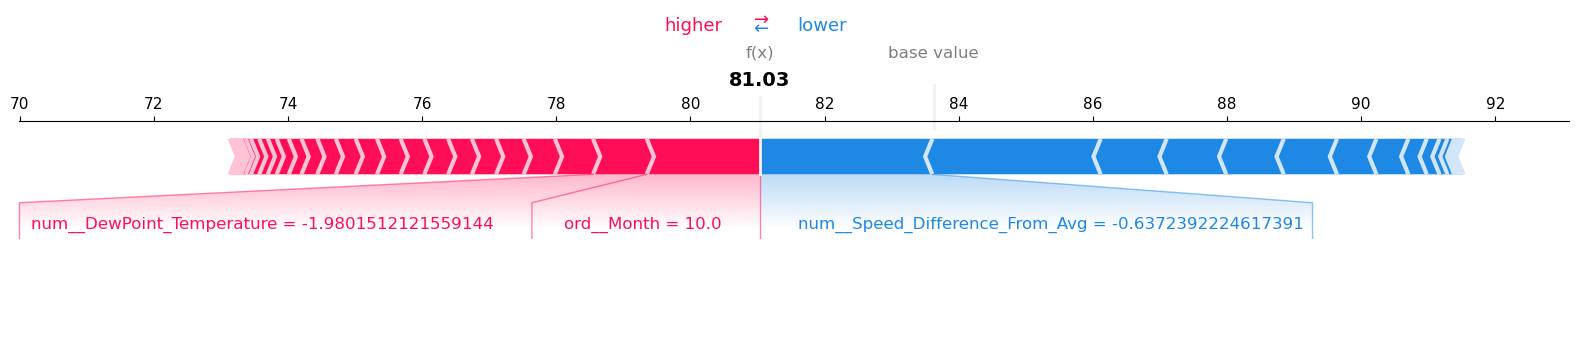

<Figure size 2000x300 with 0 Axes>

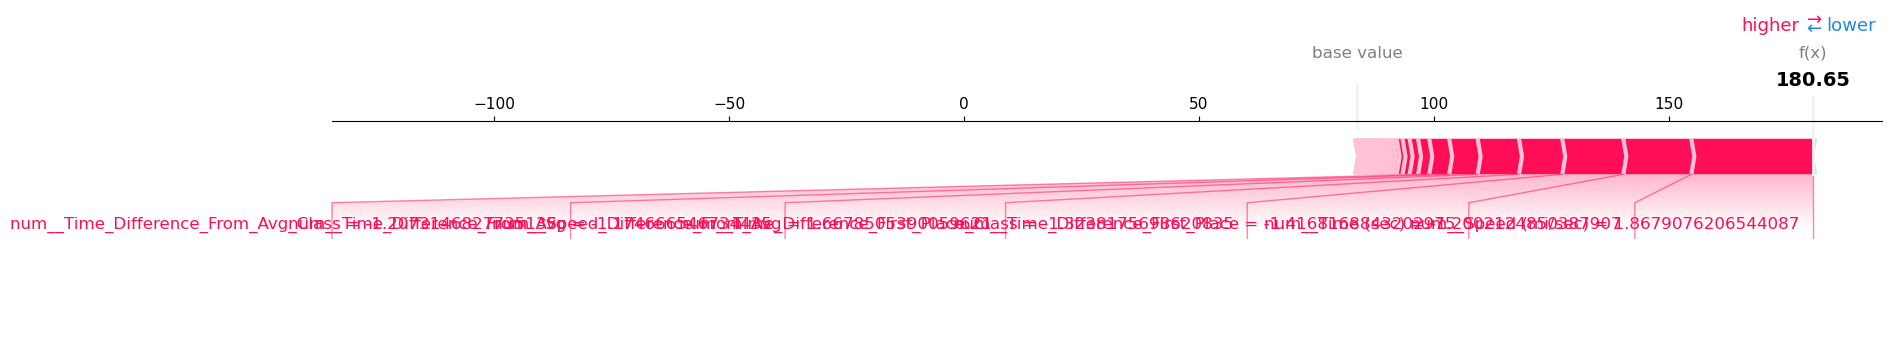

In [23]:
import shap
from IPython.display import display
import matplotlib.pyplot as plt

indices = [48, 24, 281]

for idx in indices:
    selected_instance = test_prep.iloc[idx]
    selected_shap_values = shap_values[idx]

    # Creating a figure with adjusted size
    plt.figure(figsize=(20, 3))  # Adjust the size as needed

    force_plot = shap.force_plot(base_value=explainer.expected_value, shap_values=selected_shap_values, \
                    features=selected_instance, show=False, matplotlib=True)

    # Save the figure
    plt.savefig('../figures/shap_local_' + str(idx) + '.png', dpi=600, bbox_inches='tight')
    
    # Display the plot
    plt.show()
